In [14]:
%load_ext autoreload
%autoreload 2

import nn
from graphviz import Digraph

from visualize import visualize_neural_network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def dupe_neuron(id, bias):
    return nn.NeuronGene(id, bias), nn.NeuronGene(id, bias + 0.1)

def dupe_synapse(n1a, n1b, n2a, n2b, id, weight, is_on):
    return nn.SynapseGene(id, n1a, n1b, weight, is_on), nn.SynapseGene(id, n2a, n2b, weight + 0.1, is_on)

def make_two_nets():
    a1, a2 = dupe_neuron(1, 0.5)
    # a1, a2 = dupe_neuron(1, 0.5)
    b1, b2 = dupe_neuron(2, 0.5)
    c1, c2 = dupe_neuron(3, 0.5)
    d1, d2 = dupe_neuron(4, 0.5)
    e1, e2 = dupe_neuron(5, 0.5)
    f1, f2 = dupe_neuron(6, 0.5)
    ad1, ad2 = dupe_synapse(a1, d1, a2, d2, 1, 0.5, True)
    bd1, bd2 = dupe_synapse(b1, d1, b2, d2, 2, 0.5, True)
    cd1, cd2 = dupe_synapse(c1, d1, c2, d2, 3, 0.5, False)
    ce1, ce2 = dupe_synapse(c1, e1, c2, e2, 4, 0.5, True)
    df1, df2 = dupe_synapse(d1, f1, d2, f2, 5, 0.5, True)
    ef1, ef2 = dupe_synapse(e1, f1, e2, f2, 6, 0.5, True)
    genome1 = nn.NetworkGenome([a1, b1, c1], [f1], [d1, e1], [ad1, bd1, cd1, ce1, df1, ef1])
    genome2 = nn.NetworkGenome([a2, b2, c2], [f2], [d2, e2], [ad2, bd2, cd2, ce2, df2, ef2])
    net1 = nn.Network(genome1)
    net2 = nn.Network(genome2)
    return net1, net2

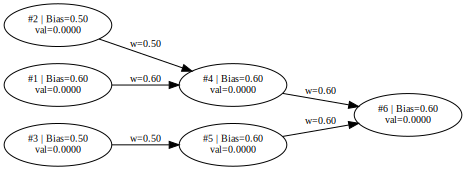

In [13]:
net1, net2 = make_two_nets()
child = nn.NetworkGenome.from_crossover(net2, net1)
child_net = nn.Network(child)
visualize_neural_network(child_net)

In [7]:
net1

Neural Network with 6 neurons, 6 synapses

Neural Network with 5 neurons, 6 synapses


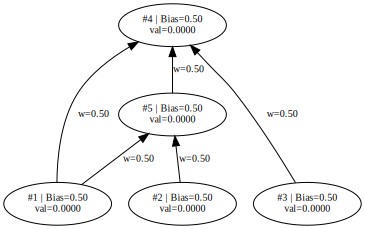

In [50]:
a = nn.NeuronGene(1, 0.5)
b = nn.NeuronGene(2, 0.5)
c = nn.NeuronGene(3, 0.5)
d = nn.NeuronGene(4, 0.5)
e = nn.NeuronGene(5, 0.5)

s1 = nn.SynapseGene(1, a, d, 0.5, True)
s2 = nn.SynapseGene(2, b, d, 0.5, False)
s3 = nn.SynapseGene(3, c, d, 0.5, True)
s4 = nn.SynapseGene(4, b, e, 0.5, True)
s5 = nn.SynapseGene(5, e, d, 0.5, True)
s8 = nn.SynapseGene(8, a, e, 0.5, True)

p1 = nn.NetworkGenome([a, b, c], [d], [e], [s1, s2, s3, s4, s5, s8])
p1 = nn.Network(p1)
print(p1)
visualize_neural_network(p1, 'BT')

Neural Network with 6 neurons, 9 synapses


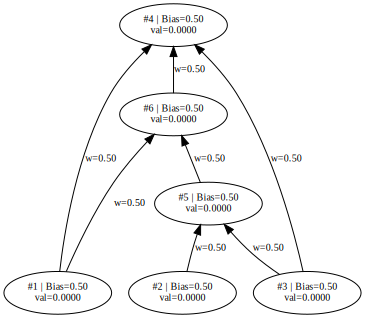

In [48]:
a = nn.NeuronGene(1, 0.5)
b = nn.NeuronGene(2, 0.5)
c = nn.NeuronGene(3, 0.5)
d = nn.NeuronGene(4, 0.5)
e = nn.NeuronGene(5, 0.5)
f = nn.NeuronGene(6, 0.5)

s1 = nn.SynapseGene(1, a, d, 0.5, True)
s2 = nn.SynapseGene(2, b, d, 0.5, False)
s3 = nn.SynapseGene(3, c, d, 0.5, True)
s4 = nn.SynapseGene(4, b, e, 0.5, True)
s5 = nn.SynapseGene(5, e, d, 0.5, False)
s6 = nn.SynapseGene(6, e, f, 0.5, True)
s7 = nn.SynapseGene(7, f, d, 0.5, True)
s9 = nn.SynapseGene(9, c, e, 0.5, True)
s10 = nn.SynapseGene(10, a, f, 0.5, True)

p2 = nn.NetworkGenome([a, b, c], [d], [e, f], [s1, s2, s3, s4, s5, s6, s7, s9, s10])
p2 = nn.Network(p2)
print(p2)
visualize_neural_network(p2, orientation='BT')

In [159]:
hex(id(p2.synapses[-3]))

'0x1203d5c70'

[Neuron 5] Bias: 0.5
[]
[Neuron 6] Bias: 0.5
[[Synapse 7] Neuron 6 -> Neuron 4, Weight: 0.5, Enabled]
Neural Network with 6 neurons, 9 synapses


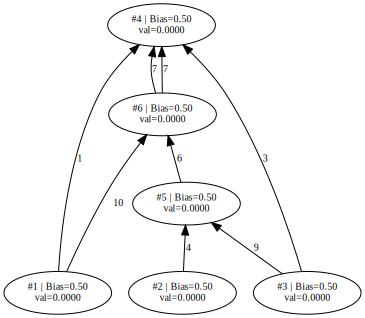

In [152]:
child = nn.NetworkGenome.from_crossover(p1, p2)
child = nn.Network(child)
print(child)
visualize_neural_network(child, 'BT')

In [164]:
hex(id(child.neurons[-1].out_synapses[0])), hex(id(child.neurons[-1].out_synapses[1]))

('0x107c36c60', '0x107c37170')